<a href="https://colab.research.google.com/github/PrafullaRava/Capstone/blob/main/Capstone_Project_The_Battle_of_Neighborhoods_(Week_1)_Delhi_Venues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 1 - Introduction / Business Problem**


# **Identifying suitable locations for setting up new Resturant and Observing the overall resturant scene of New Delhi**

New Delhi is the capital of India which attracts people from all the country as well as Tourist. India is a very diverse nation with different types of cuisine in each part of the country New Delhi being the capital is home to all these cuisines because of these amalgamation it is very important to clearly visualise the food culture in order to come up with new venues.
Here we will try to find if someone wants to open a new restaurant in the city, then which location is best suited for it keeping in mind the competitors and which income group of people will be attracted most to it based on the population of the neighbourhood.

These report will not only help individual businesses but also to Resturant Chain owners to stratigically choose the best location depending on the specialities they offer as i will try to come up with a region wise distribution of cuisines of the capital as well as the competative landscape of the region.
We will use data science tools and methodology to generate the most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.


## **Chapter 2- The Data**

In this research I will be combining data from two different sources to be able to answer the research questions.


## **Part one - List of districts of Delhi(wikipedia)**


From the wikipedia page we will get data about the District, including Headquarters and Sub divisions etc. This will be the starting point for us in building a data frame to answer our research questions. This data is publically available on https://en.wikipedia.org/wiki/List_of_districts_of_Delhi. It is all structered tabular data in CSV file. To be able to use the data I will combine differend data sets and clean the data to be able to properly work with it.


## **Part two - Foursquare**


Foursquare will provide us with additional data about available venues in these Sub Divisions. Using the Foursquare API I will gather information about (popular) venues in the Sub Divisions. Based on the most popular venues the municipalities will be clustered together using a KNN algorithm. We will add the location data and clusters to the municipality dataframe.



In [59]:
import numpy as np 
import pandas as pd 

In [60]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Delhi')[0]
df.set_index('Sl.No.', inplace=True)
iter_list=[1,2,4,8]
for i in iter_list:
  df['District'][i]=df['District'][i].split('[')[0]


In [61]:
df

,District,Headquarters,Sub divisions (Tehsils),Sub divisions (Tehsils).1,Sub divisions (Tehsils).2
Sl.No.,,,,,
1,New Delhi,Jamnagar House,Chanakyapuri,Delhi Cantonment,Vasant Vihar
2,Central Delhi,Daryaganj,Civil Lines,Karol Bagh,Kotwali
3,East Delhi,Shastri Nagar,Gandhi Nagar,Mayur Vihar,Preet Vihar
4,North Delhi,Alipur,Alipur,Model Town,Narela
5,North East Delhi,Nand Nagri,Karawal Nagar,Seelampur,Yamuna Vihar
6,North West Delhi,Kanjhawala,Kanjhawala,Rohini,Saraswati Vihar
7,Shahdara,Nand Nagri,Seemapuri,Shahdara,Vivek Vihar
8,South Delhi,Saket,Hauz Khas,Mehrauli,Saket
9,South East Delhi,Defence Colony,Defence Colony,Kalkaji,Sarita Vihar


In [62]:
df.shape

(11, 5)

In [63]:
df_Sub_divisions = pd.DataFrame(np.repeat(df.values,3,axis=0))
df_Sub_divisions.columns = df.columns
df_Sub_divisions

,District,Headquarters,Sub divisions (Tehsils),Sub divisions (Tehsils).1,Sub divisions (Tehsils).2
0,New Delhi,Jamnagar House,Chanakyapuri,Delhi Cantonment,Vasant Vihar
1,New Delhi,Jamnagar House,Chanakyapuri,Delhi Cantonment,Vasant Vihar
2,New Delhi,Jamnagar House,Chanakyapuri,Delhi Cantonment,Vasant Vihar
3,Central Delhi,Daryaganj,Civil Lines,Karol Bagh,Kotwali
4,Central Delhi,Daryaganj,Civil Lines,Karol Bagh,Kotwali
5,Central Delhi,Daryaganj,Civil Lines,Karol Bagh,Kotwali
6,East Delhi,Shastri Nagar,Gandhi Nagar,Mayur Vihar,Preet Vihar
7,East Delhi,Shastri Nagar,Gandhi Nagar,Mayur Vihar,Preet Vihar
8,East Delhi,Shastri Nagar,Gandhi Nagar,Mayur Vihar,Preet Vihar
9,North Delhi,Alipur,Alipur,Model Town,Narela


In [64]:
A = [i for i in range(32)]
iter_list2 = [x for x in A if x%3 == 0]
print(iter_list2)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


In [65]:
for i in iter_list2:
  df_Sub_divisions['Sub divisions (Tehsils)'][i+1]=  df_Sub_divisions['Sub divisions (Tehsils).1'][i+1]
  df_Sub_divisions['Sub divisions (Tehsils)'][i+2]=  df_Sub_divisions['Sub divisions (Tehsils).2'][i+1]

In [66]:
df_Sub_divisions.drop(columns=['Sub divisions (Tehsils).1','Sub divisions (Tehsils).2'], inplace=True)
df_Sub_divisions.rename(columns={"Sub divisions (Tehsils)":"Sub_Division"},inplace=True)
df_Sub_divisions.head()

,District,Headquarters,Sub_Division
0,New Delhi,Jamnagar House,Chanakyapuri
1,New Delhi,Jamnagar House,Delhi Cantonment
2,New Delhi,Jamnagar House,Vasant Vihar
3,Central Delhi,Daryaganj,Civil Lines
4,Central Delhi,Daryaganj,Karol Bagh


In [67]:
df_Sub_divisions.shape

(33, 3)

In [10]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Delhi_food")

df_Sub_divisions['Major_Dist_Coord']= df_Sub_divisions['Sub_Division'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_Sub_divisions[['Latitude', 'Longitude']] = df_Sub_divisions['Major_Dist_Coord'].apply(pd.Series)

df_Sub_divisions.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df_Sub_divisions

,District,Headquarters,Sub_Division,Latitude,Longitude
0,New Delhi,Jamnagar House,Chanakyapuri,28.594677,77.188521
1,New Delhi,Jamnagar House,Delhi Cantonment,28.593833,77.134979
2,New Delhi,Jamnagar House,Vasant Vihar,28.560691,77.160791
3,Central Delhi,Daryaganj,Civil Lines,28.676851,77.225030
4,Central Delhi,Daryaganj,Karol Bagh,28.652998,77.189023
5,Central Delhi,Daryaganj,Kotwali,26.921589,85.110784
6,East Delhi,Shastri Nagar,Gandhi Nagar,18.181389,80.547026
7,East Delhi,Shastri Nagar,Mayur Vihar,23.263183,77.427596
8,East Delhi,Shastri Nagar,Preet Vihar,28.641441,77.295259
9,North Delhi,Alipur,Alipur,28.795996,77.136071


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [12]:
address = 'Delhi'

geolocator = Nominatim(user_agent="Delhi_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [13]:
# create map of Cologne using latitude and longitude 
map_cologne = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df_Sub_divisions['Latitude'], df_Sub_divisions['Longitude'], df_Sub_divisions['Sub_Division']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cologne) 
    
map_cologne

In [14]:
CLIENT_ID = 'R1PJASFQ3D0OVPRNJPRAF32YEFOLOF3OATKGQXU5B5A15X54' # your Foursquare ID
CLIENT_SECRET = '4RT1X5JUOTABBX23ON5I20P5DSDTCBXIYIUJJJ4KD1EXLQEI' # your Foursquare Secret
ACCESS_TOKEN = 'HUULXHRUHFGFRPQZBUJR333KFCIHSBMK0UXVORLDFHYENDG1' # your FourSquare Access Token
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R1PJASFQ3D0OVPRNJPRAF32YEFOLOF3OATKGQXU5B5A15X54
CLIENT_SECRET:4RT1X5JUOTABBX23ON5I20P5DSDTCBXIYIUJJJ4KD1EXLQEI


In [15]:
df_Sub_divisions.loc[0, 'Sub_Division']

'Chanakyapuri'

In [16]:
neighborhood_latitude = df_Sub_divisions.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_Sub_divisions.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_Sub_divisions.loc[0, 'Sub_Division'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chanakyapuri are 28.5946775, 77.1885212.


In [17]:
LIMIT = 15
radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=R1PJASFQ3D0OVPRNJPRAF32YEFOLOF3OATKGQXU5B5A15X54&client_secret=4RT1X5JUOTABBX23ON5I20P5DSDTCBXIYIUJJJ4KD1EXLQEI&v=20180604&ll=28.5946775,77.1885212&radius=600&limit=15'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60cf2ea92f362615cbff8f22'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4ce89bd9e888f04dbda7436b-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d163941735',
         'name': 'Park',
         'pluralName': 'Parks',
         'primary': True,
         'shortName': 'Park'}],
       'id': '4ce89bd9e888f04dbda7436b',
       'location': {'address': 'Chanakyapuri',
        'cc': 'IN',
        'city': 'New Delhi',
        'country': 'India',
        'distance': 531,
        'formattedAddress': ['Chanakyapuri', 'New Delhi', 'Delhi', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.591798206029363,
          'lng': 77.1928598321108

In [19]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode
0,e-0-4ce89bd9e888f04dbda7436b-0,0,"[{'summary': 'This spot is popular', 'type': '...",4ce89bd9e888f04dbda7436b,Nehru Park | नेहरू पार्क (Nehru Park),Chanakyapuri,28.591798,77.192860,"[{'label': 'display', 'lat': 28.59179820602936...",531,IN,New Delhi,Delhi,India,"[Chanakyapuri, New Delhi, Delhi, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN
1,e-0-4b6d63faf964a5206c742ce3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b6d63faf964a5206c742ce3,Cafe Coffee Day,Chankyapuri,28.589840,77.190726,"[{'label': 'display', 'lat': 28.58983997418729...",580,IN,New Delhi,Delhi,India,"[Chankyapuri (Opposite Taj Palace), New Delhi,...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Opposite Taj Palace,NaN
2,e-0-4fad0418e4b027422ce0eb48-2,0,"[{'summary': 'This spot is popular', 'type': '...",4fad0418e4b027422ce0eb48,Running Trail @ Nehru Garden,"Panchsheel Road, Diplomatic Enclave",28.592299,77.192526,"[{'label': 'display', 'lat': 28.59229923367657...",472,IN,New Delhi,Delhi,India,"[Panchsheel Road, Diplomatic Enclave (Chankyap...","[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",0,[],Chankyapuri,110021
3,e-0-4d8b5f856ce6a35d37037442-3,0,"[{'summary': 'This spot is popular', 'type': '...",4d8b5f856ce6a35d37037442,The Qube,Diplomatic Enclave,28.599253,77.188648,"[{'label': 'display', 'lat': 28.59925306937054...",509,IN,New Delhi,Delhi,India,[Diplomatic Enclave (@ The Leela Palace New De...,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],@ The Leela Palace New Delhi,110 023
4,e-0-4cf9fdbcc671721eabddba18-4,0,"[{'summary': 'This spot is popular', 'type': '...",4cf9fdbcc671721eabddba18,German school,NaN,28.599751,77.187913,"[{'label': 'display', 'lat': 28.599751, 'lng':...",567,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]","[{'id': '4bf58dd8d48988d1e1931735', 'name': 'A...",0,[],NaN,NaN


In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Nehru Park | नेहरू पार्क (Nehru Park),Park,28.591798,77.192860
1,Cafe Coffee Day,Café,28.589840,77.190726
2,Running Trail @ Nehru Garden,Trail,28.592299,77.192526
3,The Qube,Restaurant,28.599253,77.188648
4,German school,Arcade,28.599751,77.187913


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [23]:
print ('{} unique categories in Chanakyapuri.'.format(nearby_venues['categories'].value_counts().shape[0]))

5 unique categories in Chanakyapuri.


In [24]:
print (nearby_venues['categories'].value_counts())

Restaurant    1
Arcade        1
Café          1
Trail         1
Park          1
Name: categories, dtype: int64


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        for v in results:
          venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'])])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sub_Division', 
                  'Sub_Division Latitude', 
                  'Sub_Division Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)
       

In [26]:
Delhi_venues = getNearbyVenues(names=df_Sub_divisions['Sub_Division'],
                                   latitudes=df_Sub_divisions['Latitude'],
                                   longitudes=df_Sub_divisions['Longitude']
                                  )

Chanakyapuri
Delhi Cantonment
Vasant Vihar
Civil Lines
Karol Bagh
Kotwali
Gandhi Nagar
Mayur Vihar
Preet Vihar
Alipur
Model Town
Narela
Karawal Nagar
Seelampur
Yamuna Vihar
Kanjhawala
Rohini
Saraswati Vihar
Seemapuri
Shahdara
Vivek Vihar
Hauz Khas
Mehrauli
Saket
Defence Colony
Kalkaji
Sarita Vihar
Dwarka
Kapashera
Najafgarh
Paschim Vihar
Punjabi Bagh
Rajouri Garden


In [27]:
Delhi_venues.shape

(1165, 7)

In [28]:
Delhi_venues.head()

,Sub_Division,Sub_Division Latitude,Sub_Division Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chanakyapuri,28.594677,77.188521,Amour Bistro,28.601569,77.185923,Café
1,Chanakyapuri,28.594677,77.188521,The Leela Palace,28.579923,77.189291,Hotel
2,Chanakyapuri,28.594677,77.188521,Bukhara,28.596914,77.173358,North Indian Restaurant
3,Chanakyapuri,28.594677,77.188521,Jamavar Kashmiri Restaurant @ The Leela,28.580143,77.189267,Indian Restaurant
4,Chanakyapuri,28.594677,77.188521,The Potbelly,28.583796,77.187828,Northeast Indian Restaurant


In [29]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Delhi_venues_only_restaurant = Delhi_venues[Delhi_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Delhi_venues_only_restaurant.index = np.arange(1, len(Delhi_venues_only_restaurant )+1)
Delhi_venues_only_restaurant.head()

,Sub_Division,Sub_Division Latitude,Sub_Division Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chanakyapuri,28.594677,77.188521,Bukhara,28.596914,77.173358,North Indian Restaurant
2,Chanakyapuri,28.594677,77.188521,Jamavar Kashmiri Restaurant @ The Leela,28.580143,77.189267,Indian Restaurant
3,Chanakyapuri,28.594677,77.188521,The Potbelly,28.583796,77.187828,Northeast Indian Restaurant
4,Chanakyapuri,28.594677,77.188521,Lázeez Affaire,28.602237,77.186044,Indian Restaurant
5,Chanakyapuri,28.594677,77.188521,Dum Pukht,28.597194,77.173288,Indian Restaurant


In [30]:
df_Sub_Divisions_with_resturants=Delhi_venues_only_restaurant['Sub_Division'].value_counts().to_frame().reset_index()
df_Sub_Divisions_with_resturants.rename(index=str, columns={"index": "Sub_Division", "Sub_Division": "Frequency"}, inplace=True)
df_Sub_Divisions_with_resturants

,Sub_Division,Frequency
0,Hauz Khas,35
1,Vasant Vihar,35
2,Chanakyapuri,34
3,Saraswati Vihar,30
4,Saket,28
5,Civil Lines,26
6,Kalkaji,22
7,Karol Bagh,22
8,Rajouri Garden,20
9,Mehrauli,17


In [31]:
Delhi_venues_only_restaurant.shape

(337, 7)

In [32]:
Delhi_venues_only_restaurant['Venue Category'].value_counts()

Indian Restaurant                 96
Fast Food Restaurant              62
Chinese Restaurant                34
Restaurant                        29
Italian Restaurant                25
Asian Restaurant                  24
Japanese Restaurant                8
American Restaurant                8
Thai Restaurant                    5
Tibetan Restaurant                 5
South Indian Restaurant            5
North Indian Restaurant            4
Vegetarian / Vegan Restaurant      3
Australian Restaurant              3
Middle Eastern Restaurant          2
Comfort Food Restaurant            2
Falafel Restaurant                 2
Tapas Restaurant                   2
Dumpling Restaurant                2
Mediterranean Restaurant           2
Northeast Indian Restaurant        2
Bengali Restaurant                 1
Vietnamese Restaurant              1
French Restaurant                  1
Portuguese Restaurant              1
Tex-Mex Restaurant                 1
Burmese Restaurant                 1
M

In [33]:
print('There are {} unique categories.'.format(len(Delhi_venues_only_restaurant['Venue Category'].unique())))

There are 33 unique categories.


In [34]:
# create a dataframe of top 10 categories
Delhi_Venues_Top10 = Delhi_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Delhi_Venues_Top10=Delhi_Venues_Top10.reset_index()
Delhi_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Delhi_Venues_Top10

,Venue_Category,Frequency
0,Indian Restaurant,96
1,Fast Food Restaurant,62
2,Chinese Restaurant,34
3,Restaurant,29
4,Italian Restaurant,25
5,Asian Restaurant,24
6,Japanese Restaurant,8
7,American Restaurant,8
8,Thai Restaurant,5
9,Tibetan Restaurant,5


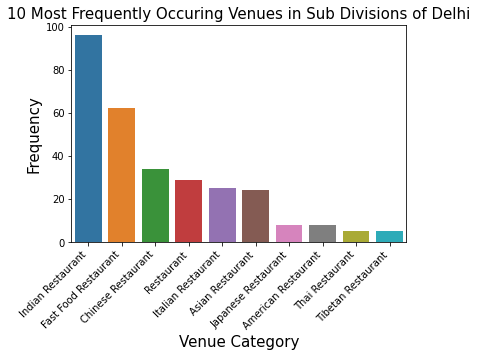

<Figure size 1296x504 with 0 Axes>

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
s=sns.barplot(x="Venue_Category", y="Frequency", data=Delhi_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Sub Divisions of Delhi', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()


In [36]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Delhi_venues_only_restaurant.shape)
Delhi_venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (337, 7)


,Sub_Division,Sub_Division Latitude,Sub_Division Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chanakyapuri,28.594677,77.188521,Bukhara,28.596914,77.173358,North Indian Restaurant
2,Chanakyapuri,28.594677,77.188521,Jamavar Kashmiri Restaurant @ The Leela,28.580143,77.189267,Indian Restaurant
3,Chanakyapuri,28.594677,77.188521,The Potbelly,28.583796,77.187828,Northeast Indian Restaurant
4,Chanakyapuri,28.594677,77.188521,Lázeez Affaire,28.602237,77.186044,Indian Restaurant
5,Chanakyapuri,28.594677,77.188521,Dum Pukht,28.597194,77.173288,Indian Restaurant
6,Chanakyapuri,28.594677,77.188521,Moti Mahal Delux,28.601677,77.187106,Indian Restaurant
7,Chanakyapuri,28.594677,77.188521,Le Cirque,28.579758,77.189374,French Restaurant
8,Chanakyapuri,28.594677,77.188521,Blue Ginger- Taj Palace Hotel,28.595566,77.170617,Vietnamese Restaurant
9,Chanakyapuri,28.594677,77.188521,FEZ Restaurant,28.602451,77.186323,Moroccan Restaurant
10,Chanakyapuri,28.594677,77.188521,Sidewok,28.602500,77.186422,Asian Restaurant


In [37]:
Delhi_venues_restaurant = Delhi_venues_only_restaurant.groupby(['Sub_Division'])['Venue Category'].count()
Delhi_venues_restaurant

Sub_Division
Chanakyapuri       34
Civil Lines        26
Defence Colony      3
Hauz Khas          35
Kalkaji            22
Kapashera          10
Karol Bagh         22
Mayur Vihar         2
Mehrauli           17
Model Town         14
Najafgarh           1
Paschim Vihar       3
Preet Vihar         9
Punjabi Bagh       14
Rajouri Garden     20
Saket              28
Saraswati Vihar    30
Sarita Vihar        4
Seelampur           1
Seemapuri           2
Shahdara            1
Vasant Vihar       35
Vivek Vihar         3
Yamuna Vihar        1
Name: Venue Category, dtype: int64

In [38]:
Delhi_Venues_restaurant_df  = Delhi_venues_restaurant.to_frame().reset_index()
Delhi_Venues_restaurant_df.columns = ['Sub_Division', 'Number of Restaurant']
Delhi_Venues_restaurant_df.index = np.arange(1, len(Delhi_Venues_restaurant_df)+1)
list_rest_no =Delhi_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Delhi_Venues_restaurant_df['Sub_Division'].to_list()

In [39]:
# one hot encoding
Delhi_onehot = pd.get_dummies(Delhi_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Delhi_onehot['Sub_Division'] = Delhi_venues_only_restaurant['Sub_Division']
fixed_columns = [Delhi_onehot.columns[-1]] +(Delhi_onehot.columns[:-1]).to_list()
Delhi_onehot = Delhi_onehot[fixed_columns]

Delhi_onehot.head()

,Sub_Division,American Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Portuguese Restaurant,Restaurant,South Indian Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Chanakyapuri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Chanakyapuri,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chanakyapuri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Chanakyapuri,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chanakyapuri,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# New dataframe size.
Delhi_onehot.shape

(337, 34)

In [41]:
Delhi_grouped = Delhi_onehot.groupby('Sub_Division').mean().reset_index()
Delhi_grouped

,Sub_Division,American Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Multicuisine Indian Restaurant,New American Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Portuguese Restaurant,Restaurant,South Indian Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Chanakyapuri,0.000000,0.088235,0.000000,0.000000,0.000000,0.000000,0.088235,0.029412,0.000000,0.000000,0.058824,0.029412,0.000000,0.352941,0.029412,0.029412,0.000000,0.029412,0.000000,0.029412,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412
1,Civil Lines,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.115385,0.000000,0.038462,0.000000,0.269231,0.000000,0.000000,0.153846,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000
2,Defence Colony,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hauz Khas,0.028571,0.000000,0.028571,0.000000,0.000000,0.000000,0.085714,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.485714,0.028571,0.057143,0.028571,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057143,0.028571,0.028571,0.000000,0.028571,0.028571,0.000000,0.000000
4,Kalkaji,0.000000,0.045455,0.045455,0.045455,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.227273,0.136364,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136364,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000
5,Kapashera,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
6,Karol Bagh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.272727,0.000000,0.045455,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000
7,Mayur Vihar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Mehrauli,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.470588,0.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000
9,Model Town,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.214286,0.000000,0.071429,0.000000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.142857,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
num_top_venues = 10
for hood in Delhi_grouped['Sub_Division']:
    print("----"+hood+"----")
    temp = Delhi_grouped[Delhi_grouped['Sub_Division'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----Chanakyapuri----
                         venue  freq
0            Indian Restaurant  0.35
1           Chinese Restaurant  0.09
2             Asian Restaurant  0.09
3         Fast Food Restaurant  0.06
4                   Restaurant  0.06
5      North Indian Restaurant  0.06
6  Northeast Indian Restaurant  0.06
7      Comfort Food Restaurant  0.03
8      South Indian Restaurant  0.03
9            French Restaurant  0.03


----Civil Lines----
                     venue  freq
0     Fast Food Restaurant  0.27
1        Indian Restaurant  0.15
2               Restaurant  0.15
3         Asian Restaurant  0.12
4       Chinese Restaurant  0.12
5       Italian Restaurant  0.08
6  North Indian Restaurant  0.04
7       Tibetan Restaurant  0.04
8      Dumpling Restaurant  0.04
9      American Restaurant  0.00


----Defence Colony----
                      venue  freq
0                Restaurant  0.33
1   New American Restaurant  0.33
2          Asian Restaurant  0.33
3        Tibetan Restauran

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Sub_Division']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Delhi_venues_sorted = pd.DataFrame(columns=columns)
Delhi_venues_sorted['Sub_Division'] = Delhi_grouped['Sub_Division']

for ind in np.arange(Delhi_grouped.shape[0]):
    Delhi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Delhi_grouped.iloc[ind, :], num_top_venues)

Delhi_venues_sorted.head(23)

,Sub_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakyapuri,Indian Restaurant,Asian Restaurant,Chinese Restaurant,North Indian Restaurant,Restaurant,Northeast Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,French Restaurant,Comfort Food Restaurant
1,Civil Lines,Fast Food Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,North Indian Restaurant,Dumpling Restaurant,Tibetan Restaurant,Australian Restaurant
2,Defence Colony,Asian Restaurant,Restaurant,New American Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Chinese Restaurant
3,Hauz Khas,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Australian Restaurant,Italian Restaurant,American Restaurant
4,Kalkaji,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Tibetan Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant
5,Kapashera,American Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Asian Restaurant,Bengali Restaurant,Brazilian Restaurant,Australian Restaurant
6,Karol Bagh,Indian Restaurant,Fast Food Restaurant,Tibetan Restaurant,Indian Chinese Restaurant,Falafel Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Dumpling Restaurant,Vietnamese Restaurant
7,Mayur Vihar,Indian Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant
8,Mehrauli,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Brazilian Restaurant,Bengali Restaurant
9,Model Town,Fast Food Restaurant,Chinese Restaurant,Restaurant,Asian Restaurant,South Indian Restaurant,Dumpling Restaurant,North Indian Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant


In [45]:
# set number of clusters (I choose 5)
kclusters = 6

Delhi_grouped_clustering = Delhi_grouped.drop('Sub_Division', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 2, 1, 2, 2, 1, 1, 1, 2], dtype=int32)

In [46]:
Delhi_merged = df_Sub_divisions.merge(df_Sub_Divisions_with_resturants,how='inner',on='Sub_Division')
Delhi_merged.drop(columns='Frequency',inplace=True)
Delhi_merged

,District,Headquarters,Sub_Division,Latitude,Longitude
0,New Delhi,Jamnagar House,Chanakyapuri,28.594677,77.188521
1,New Delhi,Jamnagar House,Vasant Vihar,28.560691,77.160791
2,Central Delhi,Daryaganj,Civil Lines,28.676851,77.225030
3,Central Delhi,Daryaganj,Karol Bagh,28.652998,77.189023
4,East Delhi,Shastri Nagar,Mayur Vihar,23.263183,77.427596
5,East Delhi,Shastri Nagar,Preet Vihar,28.641441,77.295259
6,North Delhi,Alipur,Model Town,28.702714,77.193991
7,North East Delhi,Nand Nagri,Seelampur,28.669816,77.266814
8,North East Delhi,Nand Nagri,Yamuna Vihar,28.700372,77.272773
9,North West Delhi,Kanjhawala,Saraswati Vihar,28.477224,77.083276


In [47]:
Delhi_venues_sorted.head(23)

,Sub_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakyapuri,Indian Restaurant,Asian Restaurant,Chinese Restaurant,North Indian Restaurant,Restaurant,Northeast Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,French Restaurant,Comfort Food Restaurant
1,Civil Lines,Fast Food Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,North Indian Restaurant,Dumpling Restaurant,Tibetan Restaurant,Australian Restaurant
2,Defence Colony,Asian Restaurant,Restaurant,New American Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Chinese Restaurant
3,Hauz Khas,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Australian Restaurant,Italian Restaurant,American Restaurant
4,Kalkaji,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Tibetan Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant
5,Kapashera,American Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Asian Restaurant,Bengali Restaurant,Brazilian Restaurant,Australian Restaurant
6,Karol Bagh,Indian Restaurant,Fast Food Restaurant,Tibetan Restaurant,Indian Chinese Restaurant,Falafel Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Dumpling Restaurant,Vietnamese Restaurant
7,Mayur Vihar,Indian Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant
8,Mehrauli,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Brazilian Restaurant,Bengali Restaurant
9,Model Town,Fast Food Restaurant,Chinese Restaurant,Restaurant,Asian Restaurant,South Indian Restaurant,Dumpling Restaurant,North Indian Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant


In [48]:
Delhi_venues_sorted_w_clusters = Delhi_venues_sorted
Delhi_venues_sorted_w_clusters

,Sub_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chanakyapuri,Indian Restaurant,Asian Restaurant,Chinese Restaurant,North Indian Restaurant,Restaurant,Northeast Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,French Restaurant,Comfort Food Restaurant
1,Civil Lines,Fast Food Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,North Indian Restaurant,Dumpling Restaurant,Tibetan Restaurant,Australian Restaurant
2,Defence Colony,Asian Restaurant,Restaurant,New American Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Chinese Restaurant
3,Hauz Khas,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Australian Restaurant,Italian Restaurant,American Restaurant
4,Kalkaji,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Tibetan Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant
5,Kapashera,American Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Asian Restaurant,Bengali Restaurant,Brazilian Restaurant,Australian Restaurant
6,Karol Bagh,Indian Restaurant,Fast Food Restaurant,Tibetan Restaurant,Indian Chinese Restaurant,Falafel Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Dumpling Restaurant,Vietnamese Restaurant
7,Mayur Vihar,Indian Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant
8,Mehrauli,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Brazilian Restaurant,Bengali Restaurant
9,Model Town,Fast Food Restaurant,Chinese Restaurant,Restaurant,Asian Restaurant,South Indian Restaurant,Dumpling Restaurant,North Indian Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant


In [49]:
# add clustering labels
Delhi_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [50]:
Delhi_venues_sorted_w_clusters

,Cluster Labels,Sub_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Chanakyapuri,Indian Restaurant,Asian Restaurant,Chinese Restaurant,North Indian Restaurant,Restaurant,Northeast Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,French Restaurant,Comfort Food Restaurant
1,2,Civil Lines,Fast Food Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,North Indian Restaurant,Dumpling Restaurant,Tibetan Restaurant,Australian Restaurant
2,2,Defence Colony,Asian Restaurant,Restaurant,New American Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Chinese Restaurant
3,1,Hauz Khas,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Australian Restaurant,Italian Restaurant,American Restaurant
4,2,Kalkaji,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Tibetan Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant
5,2,Kapashera,American Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Asian Restaurant,Bengali Restaurant,Brazilian Restaurant,Australian Restaurant
6,1,Karol Bagh,Indian Restaurant,Fast Food Restaurant,Tibetan Restaurant,Indian Chinese Restaurant,Falafel Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Dumpling Restaurant,Vietnamese Restaurant
7,1,Mayur Vihar,Indian Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant
8,1,Mehrauli,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Brazilian Restaurant,Bengali Restaurant
9,2,Model Town,Fast Food Restaurant,Chinese Restaurant,Restaurant,Asian Restaurant,South Indian Restaurant,Dumpling Restaurant,North Indian Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant


In [51]:
Delhi_merged = Delhi_merged.join(Delhi_venues_sorted_w_clusters.set_index('Sub_Division'),on='Sub_Division')
Delhi_merged.head(10)

,District,Headquarters,Sub_Division,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New Delhi,Jamnagar House,Chanakyapuri,28.594677,77.188521,1,Indian Restaurant,Asian Restaurant,Chinese Restaurant,North Indian Restaurant,Restaurant,Northeast Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,French Restaurant,Comfort Food Restaurant
1,New Delhi,Jamnagar House,Vasant Vihar,28.560691,77.160791,2,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,American Restaurant
2,Central Delhi,Daryaganj,Civil Lines,28.676851,77.225030,2,Fast Food Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,North Indian Restaurant,Dumpling Restaurant,Tibetan Restaurant,Australian Restaurant
3,Central Delhi,Daryaganj,Karol Bagh,28.652998,77.189023,1,Indian Restaurant,Fast Food Restaurant,Tibetan Restaurant,Indian Chinese Restaurant,Falafel Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Dumpling Restaurant,Vietnamese Restaurant
4,East Delhi,Shastri Nagar,Mayur Vihar,23.263183,77.427596,1,Indian Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant
5,East Delhi,Shastri Nagar,Preet Vihar,28.641441,77.295259,0,Fast Food Restaurant,Chinese Restaurant,South Indian Restaurant,Indian Restaurant,Italian Restaurant,Brazilian Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Restaurant,Comfort Food Restaurant
6,North Delhi,Alipur,Model Town,28.702714,77.193991,2,Fast Food Restaurant,Chinese Restaurant,Restaurant,Asian Restaurant,South Indian Restaurant,Dumpling Restaurant,North Indian Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant
7,North East Delhi,Nand Nagri,Seelampur,28.669816,77.266814,3,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Vietnamese Restaurant,Japanese Restaurant
8,North East Delhi,Nand Nagri,Yamuna Vihar,28.700372,77.272773,4,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant
9,North West Delhi,Kanjhawala,Saraswati Vihar,28.477224,77.083276,2,Indian Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Fast Food Restaurant,American Restaurant,Tapas Restaurant,Brazilian Restaurant,Burmese Restaurant


In [52]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Delhi_merged['Latitude'], 
                                  Delhi_merged['Longitude'], 
                                  Delhi_merged['Sub_Division'], 
                                  Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [53]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 0, Delhi_merged.columns[[0,1,2] + list(range(5, Delhi_merged.shape[1]))]]

,District,Headquarters,Sub_Division,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,East Delhi,Shastri Nagar,Preet Vihar,0,Fast Food Restaurant,Chinese Restaurant,South Indian Restaurant,Indian Restaurant,Italian Restaurant,Brazilian Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Restaurant,Comfort Food Restaurant
12,Shahdara,Nand Nagri,Vivek Vihar,0,Fast Food Restaurant,Indian Restaurant,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant
21,West Delhi,Shivaji Place,Paschim Vihar,0,Indian Restaurant,Multicuisine Indian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Indian Chinese Restaurant,French Restaurant,Falafel Restaurant,Comfort Food Restaurant,Japanese Restaurant
22,West Delhi,Shivaji Place,Punjabi Bagh,0,Fast Food Restaurant,Indian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Japanese Restaurant,Dumpling Restaurant
23,West Delhi,Shivaji Place,Rajouri Garden,0,Fast Food Restaurant,Restaurant,Indian Restaurant,American Restaurant,Italian Restaurant,Brazilian Restaurant,Burmese Restaurant,Bengali Restaurant,Japanese Restaurant,Comfort Food Restaurant


In [54]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 1, Delhi_merged.columns[[0,1,2] + list(range(5, Delhi_merged.shape[1]))]]

,District,Headquarters,Sub_Division,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New Delhi,Jamnagar House,Chanakyapuri,1,Indian Restaurant,Asian Restaurant,Chinese Restaurant,North Indian Restaurant,Restaurant,Northeast Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,French Restaurant,Comfort Food Restaurant
3,Central Delhi,Daryaganj,Karol Bagh,1,Indian Restaurant,Fast Food Restaurant,Tibetan Restaurant,Indian Chinese Restaurant,Falafel Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Dumpling Restaurant,Vietnamese Restaurant
4,East Delhi,Shastri Nagar,Mayur Vihar,1,Indian Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant
10,Shahdara,Nand Nagri,Seemapuri,1,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant
13,South Delhi,Saket,Hauz Khas,1,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Australian Restaurant,Italian Restaurant,American Restaurant
14,South Delhi,Saket,Mehrauli,1,Indian Restaurant,Italian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Brazilian Restaurant,Bengali Restaurant
18,South East Delhi,Defence Colony,Sarita Vihar,1,Indian Restaurant,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant,Falafel Restaurant,Dumpling Restaurant,Chinese Restaurant


In [55]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 2, Delhi_merged.columns[[0,1,2] + list(range(5, Delhi_merged.shape[1]))]]

,District,Headquarters,Sub_Division,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Delhi,Jamnagar House,Vasant Vihar,2,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,American Restaurant
2,Central Delhi,Daryaganj,Civil Lines,2,Fast Food Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,North Indian Restaurant,Dumpling Restaurant,Tibetan Restaurant,Australian Restaurant
6,North Delhi,Alipur,Model Town,2,Fast Food Restaurant,Chinese Restaurant,Restaurant,Asian Restaurant,South Indian Restaurant,Dumpling Restaurant,North Indian Restaurant,Comfort Food Restaurant,Indian Chinese Restaurant,French Restaurant
9,North West Delhi,Kanjhawala,Saraswati Vihar,2,Indian Restaurant,Italian Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,Fast Food Restaurant,American Restaurant,Tapas Restaurant,Brazilian Restaurant,Burmese Restaurant
15,South Delhi,Saket,Saket,2,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Tibetan Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Japanese Restaurant
16,South East Delhi,Defence Colony,Defence Colony,2,Asian Restaurant,Restaurant,New American Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Chinese Restaurant
17,South East Delhi,Defence Colony,Kalkaji,2,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Restaurant,Fast Food Restaurant,Tibetan Restaurant,Thai Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant
19,South West Delhi,Kapashera,Kapashera,2,American Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Asian Restaurant,Bengali Restaurant,Brazilian Restaurant,Australian Restaurant


In [56]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 3, Delhi_merged.columns[[0,1,2] + list(range(5, Delhi_merged.shape[1]))]]

,District,Headquarters,Sub_Division,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,North East Delhi,Nand Nagri,Seelampur,3,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Italian Restaurant,Indian Restaurant,Indian Chinese Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant,Vietnamese Restaurant,Japanese Restaurant


In [57]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 4, Delhi_merged.columns[[0,1,2] + list(range(5, Delhi_merged.shape[1]))]]

,District,Headquarters,Sub_Division,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,North East Delhi,Nand Nagri,Yamuna Vihar,4,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant
11,Shahdara,Nand Nagri,Shahdara,4,Indian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant


In [58]:
Delhi_merged.loc[Delhi_merged['Cluster Labels'] == 5, Delhi_merged.columns[[0,1,2] + list(range(5, Delhi_merged.shape[1]))]]

,District,Headquarters,Sub_Division,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,South West Delhi,Kapashera,Najafgarh,5,Asian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Australian Restaurant,Bengali Restaurant,Brazilian Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant
